In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("purchase_orders.csv")



In [4]:
#Exploratory Data Analysis
#Loading first rows of the dataset to ensure it loaded correctly
df.head(10)

,Purchase_Order_Number,Component_Code,Component_Description,Quantity,Unit_Price,Total_Price,Order_Date,Delivery_Date,Status
0,PO1001,COMP-001,Compressor Unit,500,200,100000,2021-01-05,2021-01-14,Delivered
1,PO1002,COMP-002,Condenser Coil,800,100,80000,2021-01-10,2021-01-21,Delivered
2,PO1003,COMP-003,Evaporator Coil,700,80,56000,2021-02-02,2021-02-16,Delivered
3,PO1004,COMP-004,Blower Motor,1000,50,50000,2021-02-15,2021-02-21,Delivered
4,PO1005,COMP-005,Expansion Valve,1200,20,24000,2021-03-10,2021-03-21,Delivered
5,PO1006,COMP-006,Heat Exchanger,300,150,45000,2021-03-15,2021-03-29,Delivered
6,PO1007,COMP-007,Thermostat,1500,10,15000,2021-04-02,2021-04-11,Delivered
7,PO1008,COMP-008,Control Board,600,30,18000,2021-04-10,2021-04-22,Delivered
8,PO1009,COMP-009,Fan Blade,2000,5,10000,2021-05-05,2021-05-09,Delivered
9,PO1010,COMP-010,Refrigerant Gas,10000,2,20000,2021-05-10,2021-05-20,Delivered


In [5]:
# Check the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
Purchase_Order_Number    object
Component_Code           object
Component_Description    object
Quantity                  int64
Unit_Price                int64
Total_Price               int64
Order_Date               object
Delivery_Date            object
Status                   object
dtype: object


In [6]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Purchase_Order_Number    0
Component_Code           0
Component_Description    0
Quantity                 0
Unit_Price               0
Total_Price              0
Order_Date               0
Delivery_Date            0
Status                   0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
           Quantity  Unit_Price    Total_Price
count     50.000000   50.000000      50.000000
mean    2816.000000   64.700000   62160.000000
std     4352.637483   64.656155   43360.195233
min      300.000000    2.000000   10000.000000
25%      825.000000   10.000000   26250.000000
50%     1300.000000   40.000000   47500.000000
75%     2375.000000  100.000000   94500.000000
max    20000.000000  200.000000  180000.000000


In [8]:
# Check for duplicates
print("\nDuplicates:")
print(df.duplicated().sum())


Duplicates:
0


In [9]:
#Data Transformation
# Convert dates to datetime objects
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])

In [10]:
# KPI 1: 
# Cost Savings: Reduction in purchase costs through better negotiation and supplier selection. 
# You can analyze the total spend by supplier or identify the top suppliers based on total spend.
supplier_spend = df.groupby('Component_Description')['Total_Price'].sum().sort_values(ascending=False)
print("\nTop Components by Total Spend:")
print(supplier_spend)


Top Components by Total Spend:
Component_Description
Compressor Unit    700000
Condenser Coil     570000
Evaporator Coil    408000
Blower Motor       375000
Heat Exchanger     375000
Expansion Valve    180000
Control Board      150000
Refrigerant Gas    150000
Thermostat         125000
Fan Blade           75000
Name: Total_Price, dtype: int64


In [11]:
# KPI 2: 
# Order Accuracy: Analyze the percentage of orders that were delivered correctly and on time to assess supplier performance.
on_time_orders = df[df['Status'] == 'Delivered']
accuracy = (on_time_orders.shape[0] / df.shape[0]) * 100
print("\nOrder Accuracy (%):", accuracy)


Order Accuracy (%): 98.0


In [12]:
# KPI 3:  
#Calculate average order quantity: Calculate the average quantity ordered per purchase order.
#For manufacturing businesses, the average order quantity influences production planning and scheduling. 
average_order_quantity = df['Quantity'].mean()

print(f"Average Order Quantity: {average_order_quantity:.2f}")

Average Order Quantity: 2816.00


In [13]:
# KPI 4: Average Order Value: Calculate the average total price per purchase order.
# Revenue Tracking: AOV provides insights into the average revenue generated from each purchase. 
# By monitoring changes in AOV over time, businesses can assess the effectiveness of marketing campaigns, 
# pricing strategies, and product offerings.

# Calculate Average Order Value
average_order_value = df['Total_Price'].mean()

print(f"Average Order Value: {average_order_value:.2f}")

Average Order Value: 62160.00


In [14]:
# KPI 5: Order Processing Time
# Competitive Advantage: Businesses that can efficiently process orders and deliver products ahead of their 
#competitors gain a competitive edge.

# Calculate Order Processing Time
df['Order_Processing_Time'] = df['Delivery_Date'] - df['Order_Date']

# Convert timedelta to days (optional)
df['Order_Processing_Time_Days'] = df['Order_Processing_Time'].dt.days

# Print the DataFrame with Order Processing Time
print(df[['Purchase_Order_Number', 'Order_Processing_Time_Days']])

   Purchase_Order_Number  Order_Processing_Time_Days
0                 PO1001                           9
1                 PO1002                          11
2                 PO1003                          14
3                 PO1004                           6
4                 PO1005                          11
5                 PO1006                          14
6                 PO1007                           9
7                 PO1008                          12
8                 PO1009                           4
9                 PO1010                          10
10                PO1011                          11
11                PO1012                           8
12                PO1013                           7
13                PO1014                          11
14                PO1015                          11
15                PO1016                          13
16                PO1017                           9
17                PO1018                      

In [15]:
# Summary statistics
print("Summary Statistics of Order Processing Time:")
print(df['Order_Processing_Time_Days'].describe())

Summary Statistics of Order Processing Time:
count    50.000000
mean      8.960000
std       4.977336
min       1.000000
25%       5.000000
50%       9.000000
75%      11.750000
max      20.000000
Name: Order_Processing_Time_Days, dtype: float64


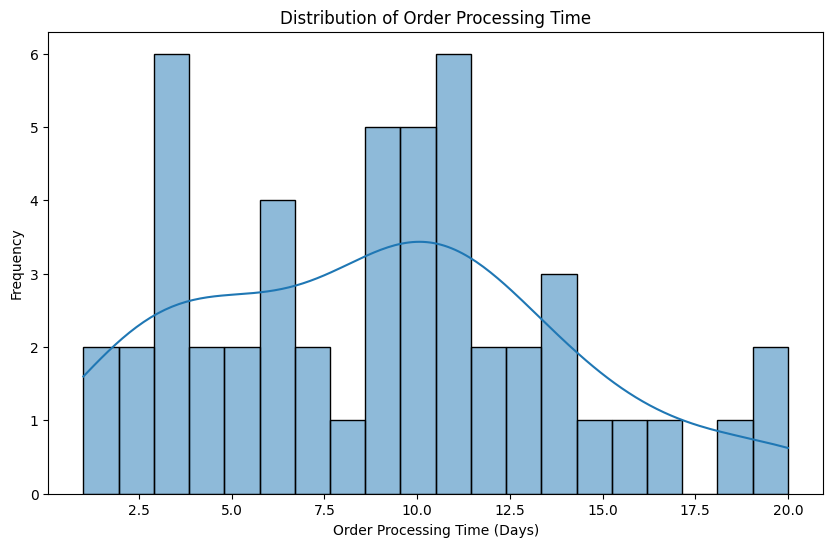

In [16]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Processing_Time_Days'], kde=True, bins=20)
plt.title('Distribution of Order Processing Time')
plt.xlabel('Order Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [17]:
# KPI 6
# Delivery Performance: Analyze the delivery performance by calculating the percentage of orders delivered on time.
# Process Improvement: Monitoring delivery performance can highlight inefficiencies in the supply chain or logistics processes. 
# Identifying and addressing these can lead to smoother operations.
# Define acceptable delivery period (e.g., 14 days)
acceptable_delivery_period = 10

# Calculate if the delivery is on time
df['On_Time_Delivery'] = (df['Delivery_Date'] - df['Order_Date']).dt.days <= acceptable_delivery_period

# Calculate the percentage of orders delivered on time
on_time_percentage = (df['On_Time_Delivery'].sum() / len(df)) * 100

# Display the result
print(f"Percentage of Orders Delivered On Time: {on_time_percentage:.2f}%")

# Display the DataFrame with the On_Time_Delivery column
print(df[['Purchase_Order_Number', 'Component_Code', 'On_Time_Delivery']])

Percentage of Orders Delivered On Time: 62.00%
   Purchase_Order_Number Component_Code  On_Time_Delivery
0                 PO1001       COMP-001              True
1                 PO1002       COMP-002             False
2                 PO1003       COMP-003             False
3                 PO1004       COMP-004              True
4                 PO1005       COMP-005             False
5                 PO1006       COMP-006             False
6                 PO1007       COMP-007              True
7                 PO1008       COMP-008             False
8                 PO1009       COMP-009              True
9                 PO1010       COMP-010              True
10                PO1011       COMP-001             False
11                PO1012       COMP-002              True
12                PO1013       COMP-003              True
13                PO1014       COMP-004             False
14                PO1015       COMP-005             False
15                PO1016 

In [18]:
# Calculate the percentage of orders delivered on time
on_time_percentage = (df['On_Time_Delivery'].sum() / len(df)) * 100
print(f"Percentage of Orders Delivered On Time: {on_time_percentage:.2f}%")

Percentage of Orders Delivered On Time: 62.00%


In [19]:
# Breakdown by Component
component_performance = df.groupby('Component_Code')['On_Time_Delivery'].mean() * 100
print("\nOn-Time Delivery Rate by Component:")
print(component_performance)


On-Time Delivery Rate by Component:
Component_Code
COMP-001    40.0
COMP-002    20.0
COMP-003    80.0
COMP-004    80.0
COMP-005    40.0
COMP-006    60.0
COMP-007    80.0
COMP-008    60.0
COMP-009    80.0
COMP-010    80.0
Name: On_Time_Delivery, dtype: float64


In [20]:
# Visualization: On-Time Delivery Performance
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Overall On-Time Delivery Performance')

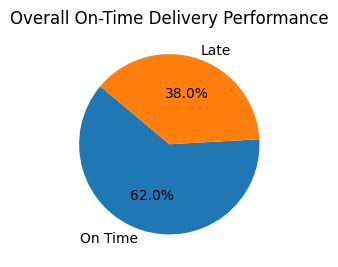

In [21]:
# Pie chart for overall on-time delivery rate
plt.subplot(1, 2, 1)
plt.pie([on_time_percentage, 100 - on_time_percentage], labels=['On Time', 'Late'], autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Overall On-Time Delivery Performance')

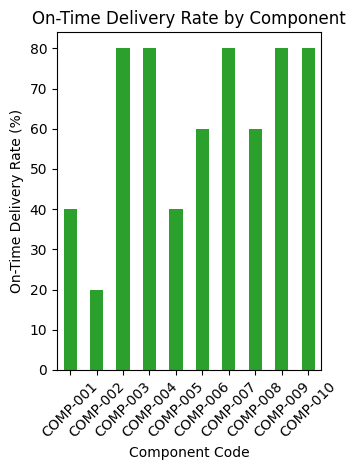

In [22]:
# Bar chart for on-time delivery by component
plt.subplot(1, 2, 2)
component_performance.plot(kind='bar', color='#2ca02c')
plt.title('On-Time Delivery Rate by Component')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xlabel('Component Code')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()